In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

### Variable Definitions

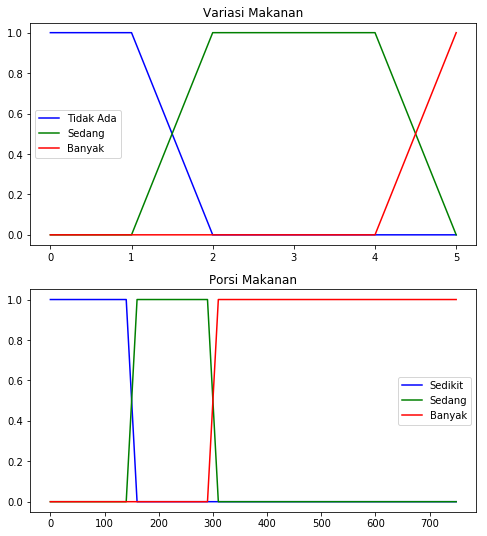

In [2]:
# Variasi Makanan
x_variasi = np.arange(0, 6, 1)

variasi_takada = fuzz.trapmf(x_variasi, [0, 0, 1, 2])
variasi_sedang = fuzz.trapmf(x_variasi, [1, 2, 4, 5])
variasi_banyak = fuzz.trapmf(x_variasi, [4, 5, 5, 5])

# Porsi Makanan
x_porsi = np.arange(0, 750, 1)

porsi_sedikit = fuzz.trapmf(x_porsi, [0, 0, 140, 160])
porsi_sedang = fuzz.trapmf(x_porsi, [140, 160, 290, 310])
porsi_banyak = fuzz.trapmf(x_porsi, [290, 310, 750, 750])

# Visualisasi
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(8, 9))

ax0.plot(x_variasi, variasi_takada, 'b', linewidth=1.5, label='Tidak Ada')
ax0.plot(x_variasi, variasi_sedang, 'g', linewidth=1.5, label='Sedang')
ax0.plot(x_variasi, variasi_banyak, 'r', linewidth=1.5, label='Banyak')
ax0.set_title('Variasi Makanan')
ax0.legend()

ax1.plot(x_porsi, porsi_sedikit, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_porsi, porsi_sedang, 'g', linewidth=1.5, label='Sedang')
ax1.plot(x_porsi, porsi_banyak, 'r', linewidth=1.5, label='Banyak')
ax1.set_title('Porsi Makanan')
ax1.legend()

plt.show()

### Rules

In [3]:
from pprint import pprint

q_variasi = [variasi_takada, variasi_sedang, variasi_banyak]
q_porsi = [porsi_sedikit, porsi_sedang, porsi_banyak]

database = [
    {"porsi": 170, "variasi": 2, "makanan": ["110g Roti tawar", "60g Telur rebus"]},
    {"porsi": 120, "variasi": 2, "makanan": ["60g Apel", "60g Pisang"]},
    {"porsi": 400, "variasi": 3, "makanan": ["200g Oatmeal", "100g Tahu rebus", "100g Telur dadar"]},
    {"porsi": 100, "variasi": 1, "makanan": ["100g Roti tawar"]},
    {"porsi": 340, "variasi": 1, "makanan": ["340g Brokoli"]}
]

fuzzify_variasi = lambda val: [fuzz.interp_membership(x_variasi, q, val) for q in q_variasi]
fuzzify_porsi = lambda val: [fuzz.interp_membership(x_porsi, q, val) for q in q_porsi]

def get_recommendation(i_variasi=1, i_porsi=1):
    rec = []
    for row in database:
        var = fuzzify_variasi(row["variasi"])
        por = fuzzify_porsi(row["porsi"])
        matrix = [[min(p, v) for p in por] for v in var]
        confidence = max(*[matrix[i_variasi][p] for p in range(3)], *[matrix[v][i_porsi] for v in range(3)])
        if confidence:
            rec.append((row, confidence))
    return rec

In [5]:
get_recommendation(1, 1)

[({'makanan': ['110g Roti tawar', '60g Telur rebus'],
   'porsi': 170,
   'variasi': 2},
  1.0),
 ({'makanan': ['60g Apel', '60g Pisang'], 'porsi': 120, 'variasi': 2}, 1.0),
 ({'makanan': ['200g Oatmeal', '100g Tahu rebus', '100g Telur dadar'],
   'porsi': 400,
   'variasi': 3},
  1.0)]